<h1> Cleaning Data </h1>

- Prepare data for Analysis
- Data is almost __NEVER__ clean
- Diagnosing data is important

<h2> Common data Problems </h2>

- Inconsistent Column names
- Missing Data
- Outliers
- Duplicate Rows
- Untidy
- Need to Process columns
- Column types can signal unexpected data values

__Example of Unclean Data__:
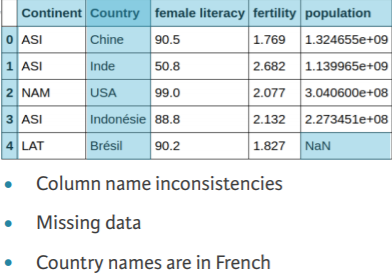

In [3]:
# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('dob_job_application_filings_subset.csv')

# Print the head of df
print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

#Print the info of df
print(df.info())


       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

            ...                         Owner's Last Name  \
0           ...            MIGLIORE                         
1           ...            BLUMENBERG                       
2           ...        

<p>
    Notice that the columns <code>'Initial Cost'</code> and <code>'Total Est. Fee'</code> are of type
    object. The currency sign in the beginning of each value in these
    columns needs to be removed, and the columns need to be converted to
    numeric. In the full DataFrame, note that there are a lot of missing
    values. You saw in the previous exercise that there are also a lot of 0
    values. Given the amount of data that is missing in the full dataset,
    it's highly likely that these 0 values represent missing data.
</p>

<h3> Exploratory Data Analysis </h3>

__Frequency counts of Continents__
<p>
   The frequency count can be obtained using the <code>value_counts(dropna=False)</code> method. This prints the number of unique values of each column in descending order. The results of <code>value_counts</code> is of <code>dtype=int</code>.  If the values in the column doesn't contain any special characters, spaces, and is not a name of a Python function, we can select a column directly by its name using <code>.column_name</code> notation. 
</p>

<code>df.continent.value_counts(dropna=False)</code>

<p>
    Another method is to use the bracket notation with the column name in quotation marks as follows:
</p>

<code>df['continent'].value_counts(dropna=False)</code>

<h3> Importance of Data Visualization </h3>

- Great way to spot outliers and obvious errors
- More than finding patterns
- Plan data cleaning steps

__Identifying Error__
We can do that using the slicing by the brackets and specifying the condition on the column using the .column name attribute.
<code>df[df.columname>value]</code>

Some factors to take in:

- Not all outliers are __BAD__ data points
- Some can be an error, but others are valid values

__Box plots__
- Visualize the Basic Summary Statistics
    - Outliers
    - Min/Max
    - 25th, 50th, 75th percentiles
<br>
<code>df.boxplot(column='population', by='continent')</code>
<br>
<p>
    We pass the column name in <code>column</code> and the <code>by</code>
    as the column name we want to compare the boxplots across. Here we want seperate box plots for each <code>continent</code> in the data.
</p>

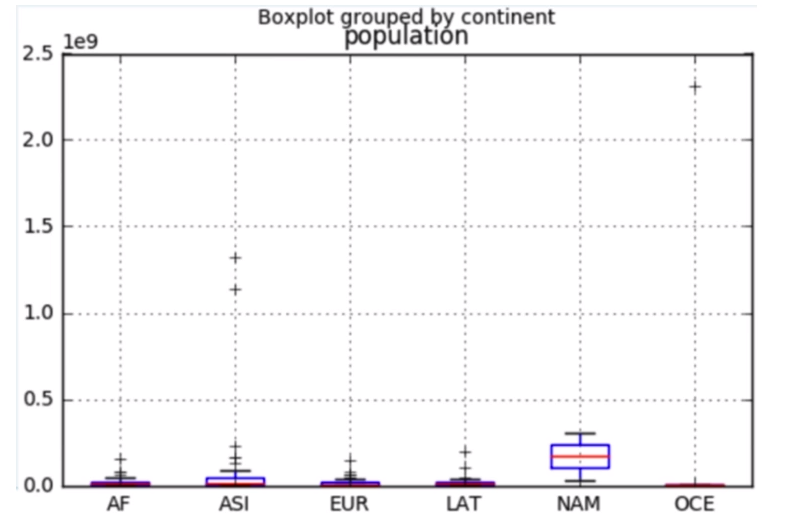

__Scatter Plots__

- Relationship b/w 2 numeric variables
- Flag potentially bad data
    - Errors not found by looking at 1 variable

__Histogram Plots__

<code># Plot the histogram</code><br>
<code>df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)</code>

Take away:
<p>
    When there is large difference between the <code>min</code> and
    <code>max</code> values after using the <code>describe()</code> method.
    We can look at the plot on a <code>log</code> scale. The keyword
    arguments <code>logx=True</code> or <code>logy=True</code> can be passed
    in to <code>.plot()</code> depending on which axis you want to rescale.
    The <code>kind</code> parameter allows you to specify the type of plot 
    use - <code>kind='hist'</code>
</p>

__Visualizing Multiple Variables with Boxplots__
<br><code>df.boxplot(column='initial_cost', by='Borough', rot=90)</code>

This creates a boxplot of <code>'initial_cost'</code> across the different values of <code>'Borough'</code>.

Take away:
Check for the extreme ouliers and see if they are __VALID__

__Visualizing multiple variables using Scatter Plots__
<code>df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)</code>
<p>
    This creates a scatter plot with <code>'initial_cost'</code> on the x
    axis and the <code>'total_est_fee'</code> on the y-axis. Rotate the x
    axis labels by 70 degrees.
</p>